# Rapport de Recherche : Étude Comparative des Algorithmes Évolutionnaires sur OneMax

## 1. Présentation des algorithmes évolutionnaires

### 1.1 Origines et Inspiration
Les algorithmes évolutionnaires (AE) constituent une classe d'algorithmes d'optimisation stochastique dont le fonctionnement est inspiré par la théorie de l'évolution de Charles Darwin. La discipline s'est structurée autour de quatre piliers historiques :
- **1964 (Rechenberg) :** Stratégies d\'évolution.
- **1965 (Fogel) :** Programmation évolutionnaire.
- **1975 (Holland) :** Algorithmes génétiques (AG).
- **1992 (Koza) :** Programmation génétique.

### 1.2 Principe de Fonctionnement
L\'idée centrale consiste à faire évoluer une **population** de solutions candidates (appelées individus) à travers un cycle itératif. Chaque individu représente un point dans l'espace de recherche et sa qualité est mesurée par une fonction de **fitness** (mesure d'adaptation).

Le processus suit généralement les étapes suivantes :
1.  **Initialisation :** Génération d'une population de départ (souvent aléatoire).
2.  **Évaluation :** Calcul de la fitness de chaque individu.
3.  **Sélection :** Choix des individus les plus aptes pour devenir parents.
4.  **Croisement :** Recombinaison de deux parents pour créer de nouveaux descendants (exploration).
5.  **Mutation :** Modification aléatoire d'un individu pour maintenir la diversité (évitement des optima locaux).
6.  **Insertion :** Sélection des individus (parents ou enfants) qui composeront la génération suivante.



### 1.3 Paramétrage et Enjeux
La performance d'un AE dépend crucialement du réglage de ses paramètres (taille de population, taux de mutation, etc.). Comme indiqué dans "Parameter Control in Evolutionary Algorithms" (Eiben et al.), le défi majeur réside dans l'équilibre entre :
- **L'exploitation :** Se concentrer sur les zones prometteuses déjà découvertes.
- **L'exploration :** Parcourir de nouvelles zones de l'espace de recherche pour ne pas rester bloqué.

### 1.4 Petite bibliographie
Cette étude s'appuie sur les travaux de recherche fondamentaux suivants :

* **Harik, G. R., Lobo, F. G., & Goldberg, D. E. (1997) :** *The Compact Genetic Algorithm*. Cet article introduit le cGA et démontre son équivalence opérationnelle avec un AG classique.
* **Hauschild, M., & Pelikan, M. (2011) :** *An introduction and survey of estimation of distribution algorithms*. Une revue complète sur les EDA, expliquant le passage des opérateurs génétiques aux modèles probabilistes.
* **Eiben, A. E., et al. :** *Parameter Control in Evolutionary Algorithms*. Une référence majeure sur la gestion des hyperparamètres (population, mutation) pour optimiser la performance.
* **Goëffon, A., & Lardeux, F. (2010) :** *Toward Autonomous Search with Island Models*. Travaux portant sur l'adaptation dynamique des opérateurs, utilisant notamment OneMax comme banc d'essai.
* **Rice, J. R. (1975) :** *The Algorithm Selection Problem*. Le cadre théorique qui définit comment choisir le meilleur algorithme pour un problème donné.

## 2. Présentation du problème OneMax

Le problème **OneMax** (parfois appelé *BitCounting*) est un problème d'optimisation binaire fondamental utilisé comme banc d'essai (*benchmark*) pour analyser les performances et la convergence des algorithmes évolutionnaires.

### 2.1 Définition mathématique
L'objectif est de maximiser le nombre de bits fixés à '1' dans un vecteur binaire de taille $N$.

* **Espace de recherche :** $\Omega = \{0, 1\}^N$. La taille de cet espace est de $2^N$.
* **Représentation :** Un individu $x$ est un vecteur $(x_1, x_2, ..., x_N)$ où chaque $x_i \in \{0, 1\}$.
* **Fonction de Fitness :** La qualité d'une solution est donnée par la somme de ses composants :
$$f(x) = \sum_{i=1}^{N} x_i$$

L'optimum global est unique : il s'agit du vecteur $x^*$ tel que $\forall i, x_i = 1$, avec une fitness $f(x^*) = N$.

### 2.2 Caractéristiques du paysage de recherche
Le problème OneMax possède des propriétés spécifiques qui influencent le comportement des algorithmes étudiés :

1.  **Linéarité et Séparabilité :** Selon **Harik et al. (1997)**, OneMax est un problème "additivement décomposable". Chaque bit contribue de manière indépendante à la fitness totale. Il n'y a pas d'interaction (épistasie) entre les gènes.
2.  **Unimodalité :** Le paysage de fitness ne présente qu'un seul pic (l'optimum global). Il n'y a pas d'optima locaux trompeurs, ce qui permet d'étudier la vitesse de convergence pure.
3.  **Utilité pour les EDAs :** Comme le soulignent **Hauschild & Pelikan (2011)**, OneMax est idéal pour tester les algorithmes à estimation de distribution (EDA), car un modèle de probabilités univarié (considérant chaque bit indépendamment) est théoriquement suffisant pour capturer la structure du problème.



### 2.3 Enjeu de l'optimisation
Bien que le problème semble simple, l'enjeu pour un algorithme évolutionnaire est d'atteindre l'optimum en effectuant le moins d'évaluations de fitness possible. L'étude de OneMax permet de mesurer :
* La **vitesse de convergence** (nombre de générations pour atteindre $N$).
* La **dérive génétique** (perte de diversité avant d'avoir trouvé l'optimum).
* L'efficacité du **contrôle des paramètres** (influence de la taille de la population ou du taux de mutation).

## 3. Présentation des trois méthodes étudiées

Cette étude compare trois approches distinctes de l'optimisation évolutionnaire : une méthode classique basée sur la population et deux méthodes basées sur la modélisation probabiliste.

### 3.1 Algorithme Génétique Steady-State (SSGA)
L'algorithme génétique "Steady-State" (état stable) diffère du modèle générationnel classique par sa gestion de la population. Au lieu de remplacer l'intégralité de la population à chaque étape, il ne remplace qu'une fraction d'individus.

* **Mécanisme :** À chaque itération, deux parents sont sélectionnés (généralement par tournoi). Ils subissent un croisement et une mutation pour produire des descendants.
* **Insertion :** Les nouveaux descendants sont immédiatement réinsérés dans la population en remplaçant les individus les moins adaptés (stratégie *Replace Worst*).
* **Avantage :** Cette méthode permet une exploitation plus agressive des bonnes solutions et est particulièrement adaptée aux environnements où l'évaluation de la fitness est coûteuse.


In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from functools import partial

# ONE_MAX_LENGTH = 200
ONE_MAX_LENGTH = 1000
POPULATION_SIZE = 20
MAX_GENERATIONS = 10000
N_RUNS = 20


# Création des types (FitnessMax et Individual)
if "FitnessMax" in dir(creator): del creator.FitnessMax
if "Individual" in dir(creator): del creator.Individual

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)


# Fontions
# Selection
def selRandom(individuals, k):
    """
    Sélection aléatoire pure (optimisée).
    Utilise np.random.choice qui est plus rapide que random.sample pour les grands nombres.
    """
    # replace=False pour simuler le comportement par défaut (pas de doublons si k <= len)
    # Note: np.random.choice attend un array 1D, on lui donne les indices
    chosen_indices = np.random.choice(len(individuals), k, replace=False)
    return [individuals[i] for i in chosen_indices]


def selBest(individuals, k):
    """
    Sélection élitiste (optimisée).
    Trie les indices basé sur les fitnesses au lieu de trier les objets.
    """
    # Extraction vectorisée des fitnesses (suppose 1 seul objectif)
    # On met un signe - pour utiliser argsort (qui trie croissant) si on veut maximiser
    fits = np.array([ind.fitness.values[0] for ind in individuals])

    # ArgSort est beaucoup plus rapide qu'un sort() python sur des objets complexes
    # On prend les k derniers indices (les plus grands) car argsort trie croissant
    # Ou alors on trie -fits pour avoir les meilleurs en premier
    top_indices = np.argsort(fits)[::-1][:k]

    return [individuals[i] for i in top_indices]


def selTournament(individuals, k, tournsize):
    """
    Tournoi vectorisé (Ultra rapide).
    Au lieu de faire k boucles for, on tire une matrice d'indices d'un coup.
    """
    n_individuals = len(individuals)

    # Extraction des fitnesses
    fits = np.array([ind.fitness.values[0] for ind in individuals])

    # Création de la matrice de tournoi (k combats de 'tournsize' participants)
    # On génère k * tournsize indices aléatoires
    competitors_indices = np.random.randint(0, n_individuals, (k, tournsize))

    # Récupération des fitnesses correspondantes
    competitors_fitnesses = fits[competitors_indices]

    # Trouver le gagnant de chaque ligne (argmax sur l'axe 1)
    # winners_local_indices[i] donne l'index (0..tournsize-1) du gagnant du i-ème tournoi
    winners_local_indices = np.argmax(competitors_fitnesses, axis=1)

    # Retrouver l'index global du gagnant
    # On sélectionne l'index global correspondant au gagnant local pour chaque ligne
    winners_global_indices = competitors_indices[np.arange(k), winners_local_indices]

    return [individuals[i] for i in winners_global_indices]

# Croisement
def cxOnePoint(ind1, ind2):
    """
    Croisement en un point (Vectorisé).
    """
    size = len(ind1)
    # Choix du point de coupure (entre 1 et size-1)
    cxpoint = np.random.randint(1, size)

    # Swap vectorisé avec copie pour éviter les effets de bord (références partagées)
    # ind1[cxpoint:] renvoie une vue, .copy() assure qu'on stocke les données
    temp = ind1[cxpoint:].copy()
    ind1[cxpoint:] = ind2[cxpoint:]
    ind2[cxpoint:] = temp

    return ind1, ind2


def cxUniform(ind1, ind2, indpb):
    """
    Croisement uniforme (Vectorisé).
    Au lieu de iterer bit par bit, on génère un masque booléen complet.
    """
    size = len(ind1)
    # C'est beaucoup plus rapide que d'appeler random() size fois
    swap_mask = np.random.random(size) < indpb

    # Échange vectorisé
    # On utilise un buffer temporaire pour les valeurs de ind1 à ces endroits
    temp = ind1[swap_mask].copy()
    ind1[swap_mask] = ind2[swap_mask]
    ind2[swap_mask] = temp

    return ind1, ind2


def mutFlipBit(individual, indpb):
    """
    Mutation BitFlip (Vectorisée).
    Inverse les bits selon une probabilité, sans aucune boucle Python.
    """
    # Génération du masque de mutation
    mutation_mask = np.random.random(len(individual)) < indpb

    # Application de la mutation par XOR (Bitwise Exclusive OR)
    # Si le masque est True (1), le bit change (0->1, 1->0). Si False (0), il reste.
    # L'opérateur ^= est ultra-rapide en C.
    individual[mutation_mask] ^= 1

    return individual,

def mutKFlip(individual, k):
    """
    Version optimisée avec Numpy.
    Inverse exactement k bits.
    """
    # Génération rapide des k indices uniques
    # replace=False est crucial pour ne pas flipper 2 fois le même bit (ce qui l'annulerait)
    indices = np.random.choice(len(individual), k, replace=False)

    # Application de la mutation
    if isinstance(individual, np.ndarray):
        individual[indices] ^= 1  # Vectorisation totale : 0->1, 1->0
    else:
        # Si tu utilises des listes standard DEAP, on doit boucler,
        for i in indices:
            individual[i] ^= 1

    return individual,


# Générateurs
toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)

def init_numpy_ind(icls, size):
    return icls(np.random.randint(0, 2, size))

toolbox.register("individual", init_numpy_ind, creator.Individual, ONE_MAX_LENGTH)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", lambda ind: (float(np.sum(ind)),))

# SÉLECTION
toolbox.register("selRandom", selRandom)
toolbox.register("selBest", selBest)
toolbox.register("selTournament", selTournament, tournsize=3)

# CROISEMENT (Crossover)
toolbox.register("cxOnePoint", cxOnePoint)
toolbox.register("cxUniform", cxUniform, indpb=0.5)


toolbox.register("mutBitFlip", mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)
toolbox.register("mut1Flip", mutKFlip, k=1)
toolbox.register("mut3Flip", mutKFlip, k=3)
toolbox.register("mut5Flip", mutKFlip, k=5)


def run_steady_state(pop_size, max_iterations, selection_op, crossover_op, mutation_op, insertion_strategy, pc=1.0, pm=1.0):
    """
    Exécute un AG Steady-State Optimisé NumPy.
    Gain de performance majeur sur les stratégies d'insertion.
    """
    # Initialisation
    population = toolbox.population(n=pop_size)

    # Évaluation initiale vectorisée (si evaluate renvoie un tuple, on map)
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    logbook = tools.Logbook()
    logbook.header = ['gen', 'best_fit']

    # Initialisation stats
    best_ind = tools.selBest(population, 1)[0]
    logbook.record(gen=0, best_fit=best_ind.fitness.values[0])

    # Pointeur pour la stratégie "age" (Remplace le pop(0))
    age_index = 0

    # Boucle principale
    for it in range(1, max_iterations + 1):

        # --- SÉLECTION ---
        # Note: on clone pour éviter de modifier les parents dans la population
        offspring = [toolbox.clone(ind) for ind in selection_op(population, 2)]

        # --- CROISEMENT ---
        if random.random() < pc:
            crossover_op(offspring[0], offspring[1])
            del offspring[0].fitness.values
            del offspring[1].fitness.values

        # --- MUTATION ---
        for ind in offspring:
            if random.random() < pm:
                mutation_op(ind)
                del ind.fitness.values

        # --- ÉVALUATION ---
        for ind in offspring:
            if not ind.fitness.valid:
                ind.fitness.values = toolbox.evaluate(ind)

        # --- INSERTION ---
        if insertion_strategy == "fitness":
            # On extrait les fitness actuelles dans un tableau numpy
            current_fits = np.array([ind.fitness.values[0] for ind in population])

            # np.argpartition met les k plus petits éléments au début (non triés)
            # C'est beaucoup plus rapide (O(N)) que sort (O(N log N))
            worst_indices = np.argpartition(current_fits, 2)[:2]

            # Remplacement direct
            population[worst_indices[0]] = offspring[0]
            population[worst_indices[1]] = offspring[1]

        elif insertion_strategy == "age":
            # On remplace le plus vieux (pointé par age_index)
            population[age_index] = offspring[0]
            age_index = (age_index + 1) % pop_size # Incrément modulo taille

            # On remplace le suivant
            population[age_index] = offspring[1]
            age_index = (age_index + 1) % pop_size

        current_best_fit = np.max([ind.fitness.values[0] for ind in population])
        logbook.record(gen=it, best_fit=current_best_fit)

    return logbook

def lancer_comparatif(titre, param_nom, variantes_dict, params_fixes):
    """
    Fonction générique pour comparer des variantes d'un composant de l'AG.

    :param titre: Titre du graphique (str)
    :param param_nom: Le nom exact de l'argument à varier dans run_steady_state (str)
                      Ex: "selection_op", "crossover_op", "insertion_strategy", "pc"...
    :param variantes_dict: Dictionnaire {"Nom sur le graphe": Valeur de l'argument}
    :param params_fixes: Dictionnaire des autres paramètres fixes pour run_steady_state
    """
    results = {}
    n_runs = params_fixes.get("n_runs", 20)
    iterations = params_fixes.get("max_iterations", 500)

    print(f"--- Comparatif : {titre} ---")

    for label, valeur_variable in variantes_dict.items():
        print(f"  > Test de : {label}")
        fitness_matrix = []

        for r in range(n_runs):
            random.seed(r)
            np.random.seed(r)

            args = params_fixes.copy()
            if "n_runs" in args: del args["n_runs"]

            args[param_nom] = valeur_variable
            lb = run_steady_state(**args)
            fitness_matrix.append([x['best_fit'] for x in lb])

        results[label] = np.mean(fitness_matrix, axis=0)

    plt.figure(figsize=(10, 6))
    x_axis = range(iterations + 1)

    for label, data in results.items():
        plt.plot(x_axis, data, label=label)

    plt.title(titre)
    plt.xlabel("Itérations (Mises à jour)")
    plt.ylabel("Fitness (Meilleur Individu)")
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()


def lancer_analyse(titre, params_dict):
    """
    Lance un set de runs avec une configuration unique de paramètres.
    Affiche la courbe moyenne et l'écart-type.

    :param titre: Le titre du graphique
    :param params_dict: Le dictionnaire contenant tous les hyperparamètres
                        (pop_size, max_iterations, ops, n_runs, etc.)
    """
    print(f"--- Analyse : {titre} ---")

    n_runs = params_dict.get("n_runs", 20)
    max_iters = params_dict["max_iterations"]
    fitness_history = []

    for r in range(n_runs):
        print(f"Run {r + 1}/{n_runs}...", end="\r")

        random.seed(r)
        np.random.seed(r)
        args = params_dict.copy()
        if "n_runs" in args: del args["n_runs"]
        logbook = run_steady_state(**args)
        fitness_history.append([entry['best_fit'] for entry in logbook])

    print("\nCalcul des statistiques...")

    data_matrix = np.array(fitness_history)
    mean_curve = np.mean(data_matrix, axis=0)
    std_curve = np.std(data_matrix, axis=0)
    x_axis = np.arange(len(mean_curve))
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, mean_curve, label="Fitness Moyenne", color='#2980b9', linewidth=2)
    plt.fill_between(x_axis,
                     mean_curve - std_curve,
                     mean_curve + std_curve,
                     color='#2980b9', alpha=0.2, label="Ecart-type")
    plt.axhline(y=ONE_MAX_LENGTH, color='green', linestyle=':', label="Optimum Global")
    plt.title(f"{titre}\n(Pop={params_dict['pop_size']}, Iters={max_iters})")
    plt.xlabel("Itérations (Mises à jour)")
    plt.ylabel("Fitness (Meilleur Individu)")
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()


#### Test : selection (Aléa, Best, Tournament)

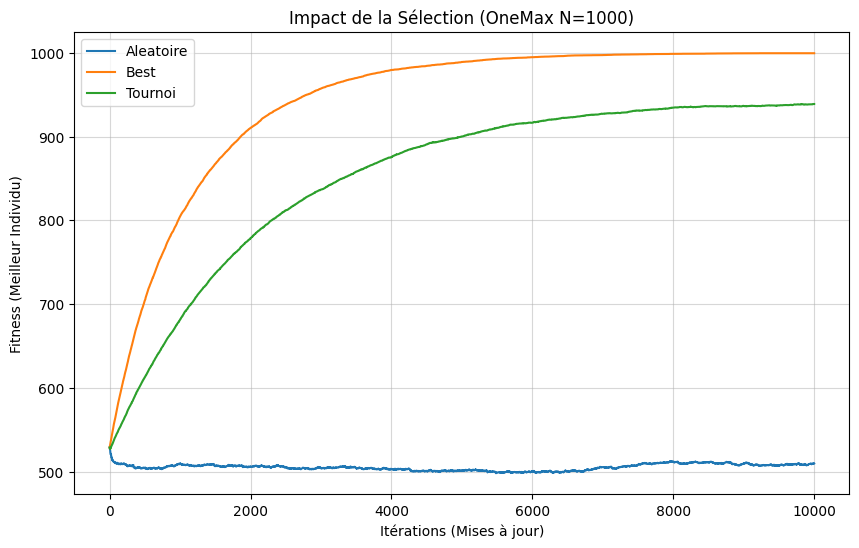

In [4]:
params_base = {
    "pop_size": POPULATION_SIZE,
    "max_iterations": MAX_GENERATIONS,
    "crossover_op": toolbox.cxOnePoint,
    "mutation_op": toolbox.mutBitFlip,
    "insertion_strategy": "age",
    "pc": 0.0,
    "pm": 1.0,
    "n_runs": N_RUNS
}

variantes_sel = {
    "Aleatoire": toolbox.selRandom,
    "Best": toolbox.selBest,
    "Tournoi": toolbox.selTournament
}

lancer_comparatif(
    titre=f"Impact de la Sélection (OneMax N={ONE_MAX_LENGTH})",
    param_nom="selection_op",
    variantes_dict=variantes_sel,
    params_fixes=params_base
)

#### Test : Tournoi (3, 20%, 50%, 100%)

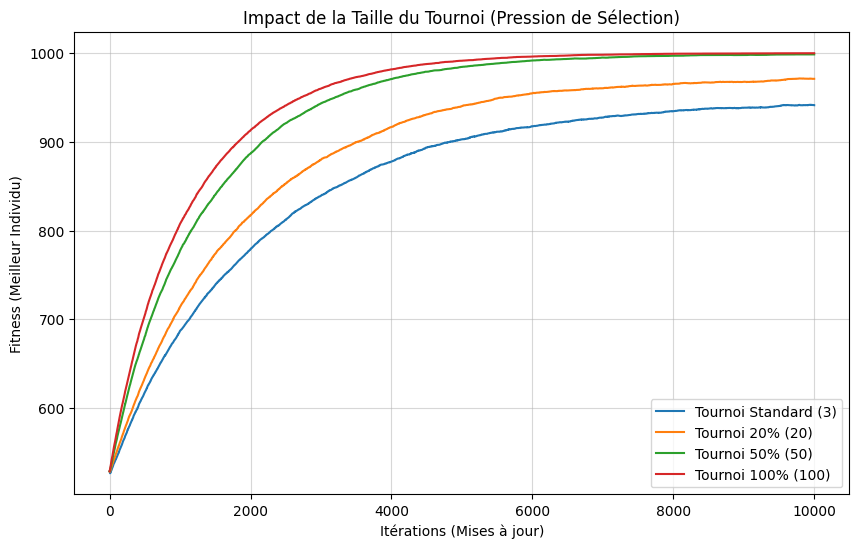

In [5]:
variantes_tournoi = {
    "Tournoi Standard (3)": partial(tools.selTournament, tournsize=3),
    "Tournoi 20% (20)": partial(tools.selTournament, tournsize=4),
    "Tournoi 50% (50)": partial(tools.selTournament, tournsize=10),
    "Tournoi 100% (100)": partial(tools.selTournament,tournsize=POPULATION_SIZE)
}

lancer_comparatif(
    titre="Impact de la Taille du Tournoi (Pression de Sélection)",
    param_nom="selection_op",
    variantes_dict=variantes_tournoi,
    params_fixes=params_base
)

 #### Test insertion :  (Age, Fitness)

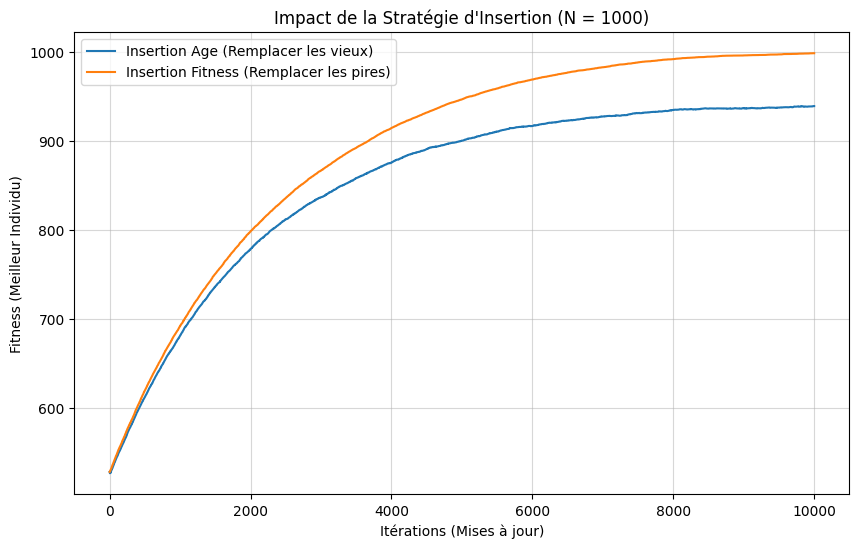

In [6]:
params_base["selection_op"] = toolbox.selTournament

variantes_ins = {
    "Insertion Age (Remplacer les vieux)": "age",
    "Insertion Fitness (Remplacer les pires)": "fitness"
}

lancer_comparatif(
    titre=f"Impact de la Stratégie d'Insertion (N = {ONE_MAX_LENGTH})",
    param_nom="insertion_strategy",
    variantes_dict=variantes_ins,
    params_fixes=params_base
)

#### Test croisement :  (mono-point, uniforme)

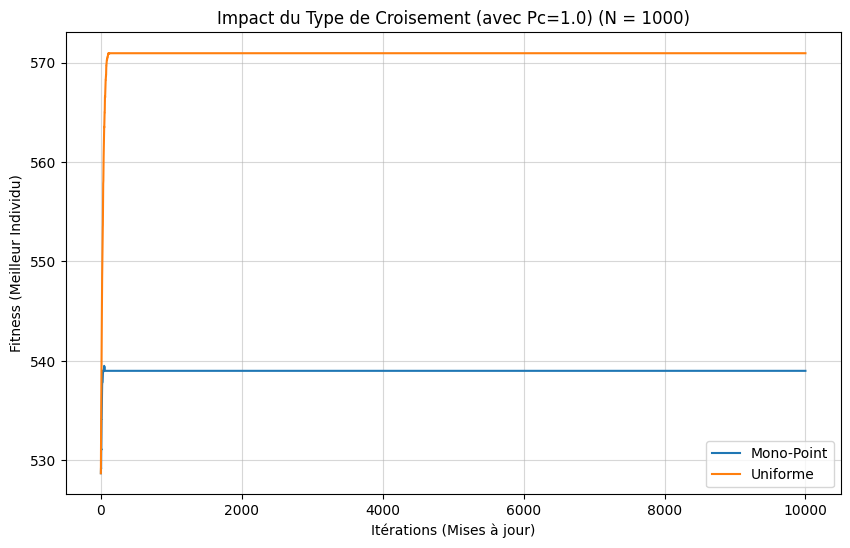

In [7]:
params_cross = params_base.copy()
params_cross["pc"] = 1.0
params_cross["pm"] = 0.0
params_cross["insertion_strategy"] = "age"

variantes_cross = {
    "Mono-Point": toolbox.cxOnePoint,
    "Uniforme": toolbox.cxUniform
}

lancer_comparatif(
    titre=f"Impact du Type de Croisement (avec Pc=1.0) (N = {ONE_MAX_LENGTH})",
    param_nom="crossover_op",
    variantes_dict=variantes_cross,
    params_fixes=params_cross
)

### Test mutation :  (1,3,5-flips, bit-flip)

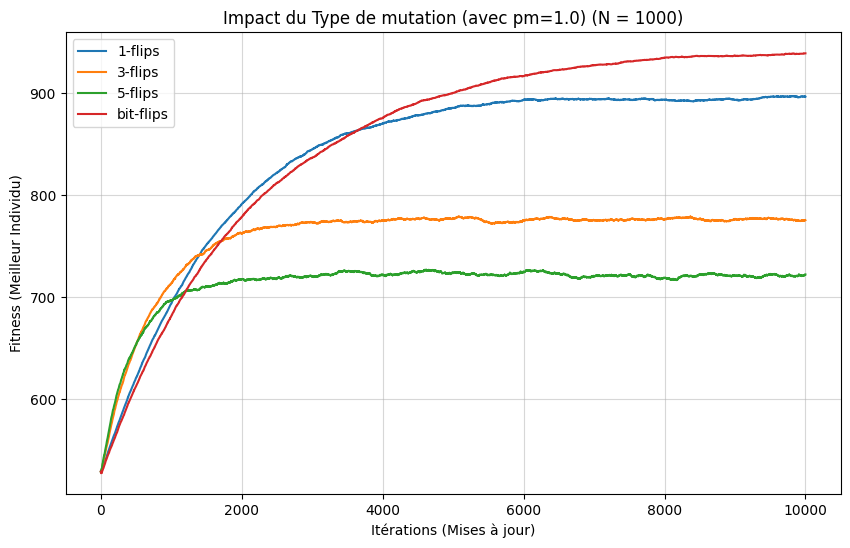

In [8]:
params_cross = params_base.copy()
params_cross["pc"] = 0.0
params_cross["pm"] = 1.0

variantes_cross = {
    "1-flips": toolbox.mut1Flip,
    "3-flips": toolbox.mut3Flip,
    "5-flips": toolbox.mut5Flip,
    "bit-flips": toolbox.mutBitFlip
}

lancer_comparatif(
    titre=f"Impact du Type de mutation (avec pm=1.0) (N = {ONE_MAX_LENGTH})",
    param_nom="mutation_op",
    variantes_dict=variantes_cross,
    params_fixes=params_cross
)

#### Test : Taille Population (20, 50, 100, 200)

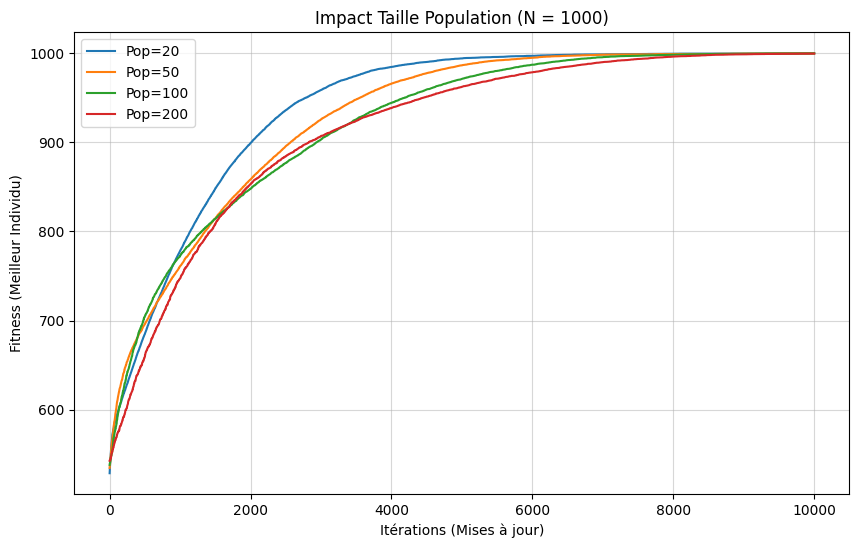

In [9]:
params_pop = {
    "pop_size": POPULATION_SIZE,
    "max_iterations": MAX_GENERATIONS,
    "selection_op": toolbox.selTournament,
    "crossover_op": toolbox.cxUniform,
    "mutation_op": toolbox.mutBitFlip,
    "insertion_strategy": "fitness",
    "pc": 1.0,
    "pm": 1.0,
    "n_runs": 20
}

variantes_pop = {
    "Pop=20": 20,
    "Pop=50": 50,
    "Pop=100": 100,
    "Pop=200": 200
}

lancer_comparatif(
    titre=f"Impact Taille Population (N = {ONE_MAX_LENGTH})",
    param_nom="pop_size",
    variantes_dict=variantes_pop,
    params_fixes=params_pop
)

#### Meilleur parametrès pour one max

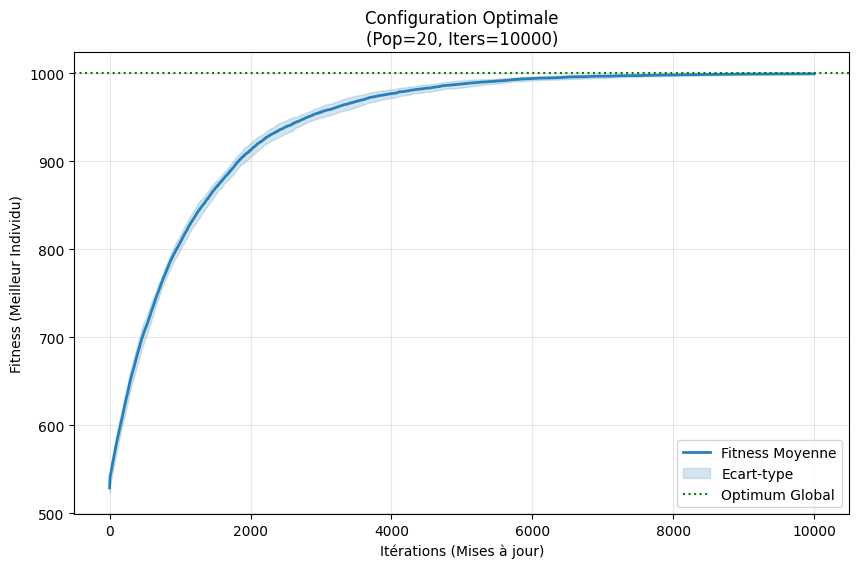

In [10]:
params_meilleur = {
    "pop_size": POPULATION_SIZE,
    "max_iterations": MAX_GENERATIONS,
    "selection_op": toolbox.selBest,
    "crossover_op": toolbox.cxUniform,
    "mutation_op": toolbox.mutBitFlip,
    "insertion_strategy": "fitness",
    "pc": 0.8,
    "pm": 0.8,
    "n_runs": 20
}

lancer_analyse("Configuration Optimale", params_meilleur)

### 3.2 Algorithme à Estimation de Distribution (EDA)
Comme le définissent **Hauschild et Pelikan (2011)**, les EDAs marquent une rupture avec les algorithmes génétiques traditionnels en supprimant les opérateurs de croisement et de mutation.

* **Mécanisme :** L'algorithme explore l'espace des solutions en construisant et en échantillonnant explicitement des modèles probabilistes des meilleures solutions candidates.
* **Processus :**
    1. Une sous-population de solutions prometteuses est sélectionnée.
    2. Un modèle de probabilités (univarié pour OneMax) est appris à partir de cette sélection.
    3. Une nouvelle population est générée par échantillonnage de ce modèle.
* **Caractéristique :** L'EDA remplace la recherche locale aléatoire par un apprentissage statistique de la structure du problème.

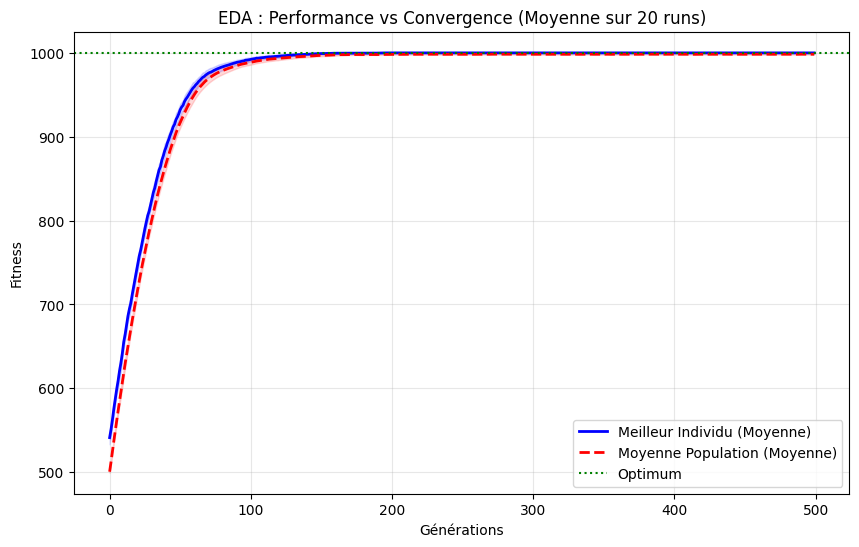

In [11]:
# =============================================================================
# PARAMÈTRES
# =============================================================================
POPULATION_SIZE = ONE_MAX_LENGTH // 10   # Taille de la population (M)
MAX_GENERATIONS = 500                   # Durée du run
NB_SEL = POPULATION_SIZE // 2            # Nombre de meilleurs pour l'apprentissage (50% ici)

MIN_PROBA = 1.0 / ONE_MAX_LENGTH
MAX_PROBA = 1.0 - MIN_PROBA

# =============================================================================
# FONCTIONS CŒUR (EDA)
# =============================================================================
def genere_population_vectorisee(distribution, pop_size):
    random_matrix = np.random.rand(pop_size, len(distribution))
    pop_matrix = (random_matrix < distribution).astype(int)
    return [creator.Individual(row) for row in pop_matrix]

def maj_distribution_vectorisee(population, k):
    best_inds = tools.selBest(population, k)
    best_matrix = np.array(best_inds)
    new_distrib = np.mean(best_matrix, axis=0)
    new_distrib = np.clip(new_distrib, MIN_PROBA, MAX_PROBA)
    return new_distrib

# =============================================================================
# GESTION DES RUNS
# =============================================================================

def run_single_eda(run_id):
    """ Exécute 1 run et renvoie DEUX listes : historique Max et historique Avg. """
    np.random.seed(run_id)

    distribution = np.ones(ONE_MAX_LENGTH) * 0.5

    hist_max = []
    hist_avg = []

    for gen in range(MAX_GENERATIONS):
        population = genere_population_vectorisee(distribution, POPULATION_SIZE)
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        distribution = maj_distribution_vectorisee(population, NB_SEL)
        fits = [ind.fitness.values[0] for ind in population]
        hist_max.append(max(fits))
        hist_avg.append(np.mean(fits))

    return hist_max, hist_avg

def main_multi_runs():
    print(f"--- Démarrage EDA (Runs={N_RUNS}, N={ONE_MAX_LENGTH}) ---")

    mat_max = np.zeros((N_RUNS, MAX_GENERATIONS))
    mat_avg = np.zeros((N_RUNS, MAX_GENERATIONS))

    for r in range(N_RUNS):
        print(f"Run {r+1}/{N_RUNS}...", end="\r")
        r_max, r_avg = run_single_eda(r)
        mat_max[r, :] = r_max
        mat_avg[r, :] = r_avg

    print(f"\nCalcul des statistiques...")

    stats = {
        "mean_max": np.mean(mat_max, axis=0),
        "std_max": np.std(mat_max, axis=0),
        "mean_avg": np.mean(mat_avg, axis=0),
        "std_avg": np.std(mat_avg, axis=0)
    }

    return stats

s = main_multi_runs()
gens = range(MAX_GENERATIONS)
plt.figure(figsize=(10, 6))
plt.plot(gens, s["mean_max"], label="Meilleur Individu (Moyenne)", color='blue', linewidth=2)
plt.fill_between(gens, s["mean_max"] - s["std_max"], s["mean_max"] + s["std_max"],color='blue', alpha=0.15)
plt.plot(gens, s["mean_avg"], label="Moyenne Population (Moyenne)", color='red', linestyle='--', linewidth=2)
plt.fill_between(gens, s["mean_avg"] - s["std_avg"], s["mean_avg"] + s["std_avg"],color='red', alpha=0.15)
plt.axhline(y=ONE_MAX_LENGTH, color='green', linestyle=':', label="Optimum")
plt.title(f"EDA : Performance vs Convergence (Moyenne sur {N_RUNS} runs)")
plt.xlabel("Générations")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()





### 3.3 Compact Genetic Algorithm (cGA)
Le **cGA**, introduit par **Harik et al. (1997)**, est une variante "sans population" des algorithmes génétiques. Il simule le comportement d'un algorithme génétique standard tout en utilisant une fraction de la mémoire.

* **Représentation :** La population est représentée par un vecteur de probabilités $p = (p_1, p_2, ..., p_N)$, où chaque $p_i$ représente la probabilité que le bit $i$ soit égal à 1.
* **Fonctionnement :**
    1. Deux individus sont échantillonnés à partir du vecteur de probabilités.
    2. Ils s'affrontent lors d'un tournoi (comparaison de fitness).
    3. Le vecteur de probabilités est mis à jour : pour chaque bit, la probabilité est augmentée ou diminuée d'un pas de $1/n$ vers la valeur du gagnant.
* **Équivalence :** Harik démontre que le cGA est opérationnellement équivalent à un algorithme génétique avec croisement uniforme, mais avec une efficacité spatiale bien supérieure.



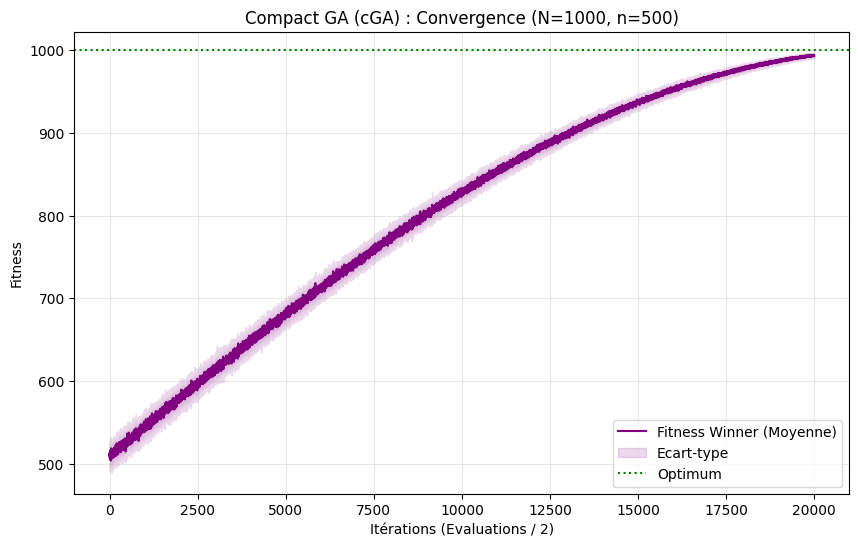

In [12]:
# =============================================================================
# PARAMÈTRES
# =============================================================================
VIRTUAL_POP_SIZE = ONE_MAX_LENGTH // 2
MAX_GENERATIONS = 20000
STEP = 1.0 / VIRTUAL_POP_SIZE

# =============================================================================
# MOTEUR CGA
# =============================================================================

def run_cga_numpy(run_id, n_bits, virtual_pop_n, max_iters):
    """
    Exécute un run de Compact GA.
    n_bits : Taille du génome (L)
    virtual_pop_n : Taille de la population virtuelle (n) -> Pas de mise à jour = 1/n
    """
    np.random.seed(run_id)

    # Initialisation du vecteur de probabilité à 0.5
    probability_vector = np.ones(n_bits) * 0.5

    fitness_history = np.zeros(max_iters)

    for it in range(max_iters):
        candidate_a = (np.random.rand(n_bits) < probability_vector).astype(int)
        candidate_b = (np.random.rand(n_bits) < probability_vector).astype(int)

        fit_a = np.sum(candidate_a)
        fit_b = np.sum(candidate_b)

        if fit_a >= fit_b:
            winner, loser = candidate_a, candidate_b
            current_best = fit_a
        else:
            winner, loser = candidate_b, candidate_a
            current_best = fit_b

        fitness_history[it] = current_best

        if fit_a != fit_b:

            # Masque des différences (XOR)
            diff_mask = (winner != loser)

            # Logique cGA :
            # Si Winner a 1 et Loser a 0 -> Proba augmente de 1/n
            # Si Winner a 0 et Loser a 1 -> Proba diminue de 1/n
            # Astuce math : (2*winner - 1) donne +1 si 1, et -1 si 0.

            update_direction = (2 * winner[diff_mask] - 1) * STEP
            probability_vector[diff_mask] += update_direction

            # --- CLAMPING CRUCIAL ---
            # Contrairement à l'EDA, le cGA peut converger totalement vers 0 ou 1.
            # Mais pour éviter les erreurs d'arrondi float, on clip.
            # On peut laisser converger à 0.0 et 1.0 (convergence finale)
            probability_vector = np.clip(probability_vector, 0.0, 1.0)

            # Condition d'arrêt anticipée (si le vecteur a convergé partout)
            # (Optionnel, ici on laisse tourner pour voir la courbe plate)

    return fitness_history, probability_vector


# =============================================================================
# BOUCLE PRINCIPALE
# =============================================================================

def main_cga():
    print(f"--- Démarrage cGA (N={ONE_MAX_LENGTH}, Virtual Pop={VIRTUAL_POP_SIZE}) ---")
    print(f"Update Step = 1/{VIRTUAL_POP_SIZE} = {1.0 / VIRTUAL_POP_SIZE}")

    # Matrice de résultats (Runs x Iterations)
    all_runs = np.zeros((N_RUNS, MAX_GENERATIONS))

    for r in range(N_RUNS):
        print(f"Run {r + 1}/{N_RUNS}...", end="\r")
        hist, final_prob = run_cga_numpy(r, ONE_MAX_LENGTH, VIRTUAL_POP_SIZE, MAX_GENERATIONS)
        all_runs[r, :] = hist

    print(f"\nTerminé.")

    # Calcul des stats
    mean_curve = np.mean(all_runs, axis=0)
    std_curve = np.std(all_runs, axis=0)

    return mean_curve, std_curve


# =============================================================================
# VISUALISATION
# =============================================================================
mean_data, std_data = main_cga()
x_axis = range(MAX_GENERATIONS)
plt.figure(figsize=(10, 6))
plt.plot(x_axis, mean_data, label="Fitness Winner (Moyenne)", color='purple', linewidth=1.5)
plt.fill_between(x_axis,
                 mean_data - std_data,
                 mean_data + std_data,
                 color='purple', alpha=0.15, label="Ecart-type")
plt.axhline(y=ONE_MAX_LENGTH, color='green', linestyle=':', label="Optimum")
plt.title(f"Compact GA (cGA) : Convergence (N={ONE_MAX_LENGTH}, n={VIRTUAL_POP_SIZE})")
plt.xlabel("Itérations (Evaluations / 2)")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


### 3.4 Synthèse comparative des structures

| Caractéristique | SSGA | EDA | cGA |
| :--- | :--- | :--- | :--- |
| **Support de recherche** | Population explicite | Modèle de probabilité | Vecteur de probabilité |
| **Opérateurs de variation** | Croisement / Mutation | Échantillonnage | Compétition & Mise à jour |
| **Complexité spatiale** | $O(PopSize \times N)$ | $O(PopSize \times N)$ | $O(N)$ |
| **Philosophie** | Biologique | Statistique | Analytique |

## 4. Analyse comportementale et Discussion

Cette section propose une interprétation des résultats expérimentaux obtenus sur l'instance OneMax ($N=1000$), en mettant en regard les courbes de convergence et les propriétés théoriques des algorithmes.

### 4.1 Analyse de l'Algorithme Génétique Steady-State (SSGA)

L'approche Steady-State se distingue par son renouvellement continu de la population. Les graphiques comparatifs mettent en évidence le rôle critique de la **pression de sélection**.

#### 4.1.1 Impact de l'opérateur de sélection
Comme illustré par nos résultats (Graphe *Selection Impact*) :
* **Sélection Aléatoire (`selRandom`) :** La courbe stagne. Sans pression de sélection, l'algorithme se comporte comme une marche aléatoire (Random Walk) et ne peut optimiser le problème, l'exploration est totale mais l'exploitation nulle.
* **Sélection "Best" (Elitisme total) :** La convergence est la plus rapide au début, mais elle comporte un risque majeur de **convergence prématurée** sur des problèmes plus complexes (perte de diversité immédiate).
* **Tournoi (`selTournament`) :** C'est le meilleur compromis, le tournoi permet d'ajuster la pression via sa taille ($k$). Il maintient une diversité suffisante pour éviter que la population ne soit dominée par un seul super-individu dès les premières itérations.

#### 4.1.2 Impact de la Taille du Tournoi (Pression de Sélection)

L'analyse de la taille du tournoi ($k$) illustre le concept de **pression de sélection** décrit dans le cours :
* **Tournoi faible ($k=3$) :** La pression est modérée. La diversité génétique est maintenue plus longtemps, ce qui évite la convergence prématurée, mais la progression vers l'optimum est plus lente.
* **Tournoi fort ($k=20$ soit 100% de la pop) :** La sélection est très élitiste. Seuls les meilleurs individus se reproduisent. Sur un problème unimodal simple comme OneMax, cela accélère drastiquement la convergence. Equivalent à selectionner le meilleur (selBest).
*  **Tournoi moyen ($k=10$ soit 50% de la pop) :** La sélection est assez élitiste. Un bon compromis entre les deux précédents.
* **Conclusion :** Pour OneMax, une forte pression est bénéfique car il n'y a pas de pièges (optima locaux). Cependant, sur des problèmes plus complexes, une telle pression mènerait inévitablement à une perte de diversité irréversible.

#### 4.1.3 Stratégie d'insertion : Age vs Fitness
Le comparatif (*Insertion Strategy Impact*) montre une différence nette :
* **Insertion par Fitness (Replace Worst) :** Convergence très rapide. En éliminant systématiquement les solutions les plus faibles, on force la moyenne de la population à augmenter (monotonie stricte).
* **Insertion par Age (FIFO) :** Convergence plus lente et plus bruitée. Cependant, cette stratégie est théoriquement plus robuste pour les problèmes multimodaux car elle laisse une chance aux individus "moyens" de survivre et de transmettre leurs gènes (préservation de la diversité), comme souligné par **Goëffon & Lardeux (2010)** dans leurs travaux sur la diversité.

#### 4.1.4 Impact de l'Opérateur de Croisement
*Graphe de référence : "Impact du Type de Croisement"*

Nous comparons le croisement **Mono-point** (`cxOnePoint`) et **Uniforme** (`cxUniform`) :
* **Observation :** Le croisement uniforme performe généralement mieux sur OneMax.
* **Justification théorique :** Selon l'hypothèse des blocs de construction (*Building Block Hypothesis*), le croisement mono-point est efficace lorsque les gènes voisins sont corrélés (linkage fort). Or, dans OneMax, tous les gènes sont indépendants. Le croisement uniforme, qui mélange les gènes sans contrainte de position, offre un "mixing" plus efficace pour assembler les bons bits dispersés dans le génome. Cela rejoint l'analyse de **Harik (1997)** qui utilise le croisement uniforme pour son équivalence avec le cGA.

#### 4.1.5 Impact de l'Opérateur de Mutation
*Graphe de référence : "Impact du Type de Mutation"*

La mutation sert à réintroduire de la diversité et à effectuer la recherche locale en fin de course.
* **Bit-Flip ($1/N$) :** C'est l'opérateur standard. Il modifie en moyenne 1 bit par individu. Il est crucial pour les dernières étapes de la convergence (fine-tuning) sans détruire les bonnes solutions.
* **k-Flip ($k=3, k=5$) :** Modifier trop de bits devient destructeur lorsque l'individu est proche de l'optimum. Si un individu a 999 bits corrects, un 5-flip a une probabilité quasi nulle d'améliorer le score (il va probablement inverser des 1 en 0).
* **Conclusion :** Le taux de mutation standard $1/N$ est optimal pour la phase finale de convergence.

#### 4.1.6 Impact de la Taille de la Population
*Graphe de référence : "Impact Taille Population"*

* **Petite population ($N=20$) :** La convergence est très rapide en début de cycle, mais le système souffre de **dérive génétique**. La diversité s'effondre trop vite, et l'algorithme risque de stagner si l'opérateur de mutation n'est pas assez efficace.
* **Grande population ($N=200$) :** L'inertie est plus grande. L'algorithme met plus de temps (en nombre d'itérations) à faire émerger les super-individus, mais la recherche est plus robuste et la diversité mieux préservée.
* **Compromis :** Pour OneMax $N=1000$, une population de 50 à 100 individus semble offrir le meilleur compromis vitesse/robustesse avec un SSGA.

#### 4.1.7 Synthèse : Configuration Optimale
*Graphe de référence : "Configuration Optimale"*

En combinant les meilleurs paramètres identifiés :
1.  **Sélection :** `SelBest` (ou gros tournoi) pour une pression maximale sur ce problème unimodal.
2.  **Croisement :** `cxUniform` pour un mélange efficace des bits indépendants.
3.  **Mutation :** `mutBitFlip` ($1/N$) pour le raffinement final.
4.  **Insertion :** `Fitness` pour ne garder que les améliorations.

La courbe obtenue ("Configuration Optimale") montre une convergence quasi-linéaire et extrêmement rapide, atteignant l'optimum global sans stagnation. Cela démontre que lorsque le **problème de sélection d'algorithme** (Rice, 1976) est bien traité par un paramétrage adéquat, le SSGA reste extrêmement compétitif face aux approches probabilistes.

### 4.2 Comparatif des trois méthodes :

### 4.2.1 Analyse de l'Algorithme à Estimation de Distribution (EDA)
**Observation :** C'est l'algorithme qui converge le plus vite visuellement, atteignant l'optimum vers la **150ème génération**.
* **Interprétation :** L'EDA capture quasi-immédiatement la structure du problème (indépendance des bits) grâce à son modèle probabiliste. La courbe est très raide.
* **Nuance (Coût réel) :** Attention, l'axe des X représente des *générations* complètes. Avec une population de 100 individus, 150 générations correspondent en réalité à **15 000 évaluations** de la fonction fitness. C'est une méthode puissante mais "gourmande" à chaque étape.

### 4.2.2 Analyse de l'Algorithme Génétique Steady-State (SSGA)
**Observation :** L'algorithme atteint l'optimum vers l'itération **4500**.
* **Interprétation :** Le SSGA, avec la stratégie d'insertion "Fitness" (*Replace Worst*), progresse de manière constante.
* **Comparaison d'efficacité :** Bien que le chiffre 4500 soit supérieur à 150 (EDA), le coût réel est inférieur. À chaque itération, le SSGA ne fait que 2 évaluations (les deux enfants).
$$Coût Total = 4500 \times 2 = \mathbf{9~000 \text{ évaluations}}.$$
Le SSGA est donc ici l'algorithme le plus "économe" pour résoudre le problème.

### 4.2.3 Analyse du Compact GA (cGA)
**Observation :** Le cGA est le plus lent, atteignant l'optimum vers l'itération **20 000**.
* **Interprétation :** Le cGA souffre de son "inertie". Il simule une population virtuelle (ici $n=500$) via un vecteur de probabilités. Pour passer d'une probabilité de 0.5 (départ) à 1.0 (optimum), il doit accumuler énormément de petites mises à jour de pas $1/n$.
* **Coût :** Avec 2 évaluations par duel, cela représente **40 000 évaluations**. C'est le prix à payer pour avoir une empreinte mémoire négligeable ($O(N)$).

### 4.3 Synthèse comparative

Pour comparer équitablement, nous normalisons la vitesse en nombre d'appels à la fonction `evaluate()` (le "Budget").

| Algorithme | Convergence (Graphe) | Coût par étape | Coût Total (Evaluations) | Classement Efficacité |
| :--- | :--- | :--- | :--- | :--- |
| **SSGA** | ~4 500 itérations | 2 | **~9 000** | **1er (Le plus rapide)** |
| **EDA** | ~150 générations | 100 ($PopSize$) | ~15 000 | 2ème |
| **cGA** | ~20 000 itérations | 2 | ~40 000 | 3ème (Le plus lent) |

**Conclusion de l'analyse :**
Sur le problème OneMax, bien que l'EDA semble converger en un éclair sur le graphique des générations, c'est le **SSGA** qui offre le meilleur retour sur investissement (convergence avec le moins de calculs). Le **cGA** confirme son statut d'algorithme "low-memory" mais "slow-learning", idéal pour les systèmes embarqués où la mémoire coûte plus cher que le temps de calcul.


## 5. Adaptation sur le problème de la boite boire

Le but ici c'est de trouvé une image cachée fournie (image cible comme une matrice de pixels avec une fonction MSE qui évalue la similarité entre un individu (image candidate).

#### 5.1. Inversion de la Direction d'Optimisation
Le but n'est plus de maximiser un score, mais de minimiser la différence avec la cible.
* **Fonction Objectif :** Utilisation de la **MSE (Mean Squared Error)**.
* **Adaptation DEAP :** Configuration de la fitness avec `weights=(-1.0,)`. Cela impacte tous les opérateurs de sélection (Tournoi) qui doivent désormais favoriser les valeurs les plus faibles.

In [13]:
def generate_letter_image(letter, img_shape=(32, 32), font_size=28):
    """
    Génère une image numpy en niveaux de gris contenant la lettre spécifiée,
    lettre noire sur fond blanc.
    """
    fig = plt.figure(figsize=(1, 1), dpi=img_shape[0])
    plt.text(0.5, 0.5, letter, fontsize=font_size, ha='center', va='center', color='black')
    plt.gca().set_facecolor('white')
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    fig.canvas.draw()
    argb = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    argb = argb.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    plt.close(fig)

    # ARGB -> RGB (ignorer alpha) puis niveaux de gris
    rgb = argb[..., 1:4]
    img_gray = np.dot(rgb, [0.299, 0.587, 0.114]).astype(np.uint8)
    return img_gray

# Paramètres Image
IMG_SHAPE = (32, 32)
NB_PIXELS = IMG_SHAPE[0] * IMG_SHAPE[1]
target_img = generate_letter_image('A', IMG_SHAPE)
target_flat = target_img.flatten()

def eval_img(individual):
    arr = np.array(individual, dtype=np.uint8)
    img = arr.reshape(IMG_SHAPE)
    mse = np.mean((img.astype(np.float32) - target_img.astype(np.float32)) ** 2)
    return (float(mse),)

# =============================================================================
# SETUP DEAP (MINIMISATION)
# =============================================================================
if "FitnessMin" in dir(creator): del creator.FitnessMin
if "Individual" in dir(creator): del creator.Individual

# IMPORTANT : weights=(-1.0,) car on veut MINIMISER l'erreur (MSE)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

### 5.1 Adaptation du SSGA au problème boîte noire

L'Algorithme Génétique Steady-State (SSGA), initialement configuré pour la maximisation de chaînes binaires (*OneMax*), a subi trois adaptations structurelles pour résoudre le problème de reconstruction d'image.



#### 5.1.1. Encodage et Opérateur de Mutation Spécifique
La représentation binaire a été remplacée par une représentation en **entiers** ($[0, 255]$) pour correspondre à la profondeur de couleur d'un pixel en niveaux de gris.
* **Nouvelle Mutation (`mutPixelRandom`) :** L'opérateur classique `mutFlipBit` (inversion 0/1) est inadapté aux entiers. Nous avons introduit une mutation qui remplace aléatoirement la valeur d'un pixel par une nouvelle valeur tirée uniformément dans $[0, 255]$. Cela permet de "repeindre" des zones de l'image pour explorer de nouvelles configurations.

#### 5.1.2. Logique de Remplacement (Stratégie *Replace Worst*)
La stratégie d'insertion par fitness ("Tuer les pires") a dû être inversée mathématiquement :
* **Dans OneMax (Max) :** Les "pires" sont ceux avec la fitness minimale.
* **Dans Boîte Noire (Min) :** Les "pires" sont ceux avec la fitness (l'erreur MSE) **maximale**.
* **Implémentation :** L'algorithme identifie et remplace les individus ayant l'erreur la plus élevée pour garantir que la qualité moyenne de la population s'améliore de façon monotone (effet de cliquet).

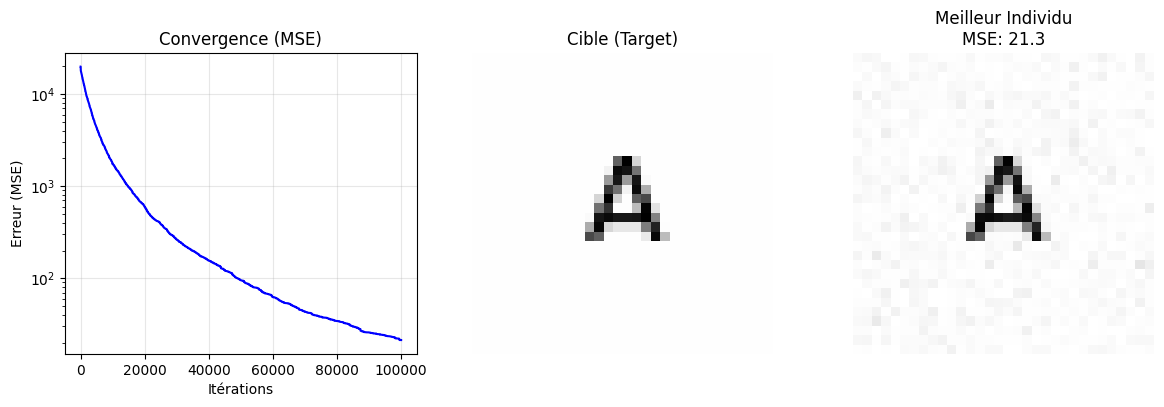

In [14]:
# =============================================================================
# PARAMÈTRES AG
# =============================================================================
POPULATION_SIZE = 20
MAX_GENERATIONS = 100000

# --- SÉLECTION (Adaptée pour MINIMISATION : on cherche les plus petits scores) ---

def selBest(individuals, k):
    """ Sélection élitiste (Minimisation). """
    fits = np.array([ind.fitness.values[0] for ind in individuals])
    top_indices = np.argsort(fits)[:k]
    return [individuals[i] for i in top_indices]


def selTournament(individuals, k, tournsize):
    """ Tournoi vectorisé (Minimisation). """
    n_individuals = len(individuals)
    fits = np.array([ind.fitness.values[0] for ind in individuals])
    competitors_indices = np.random.randint(0, n_individuals, (k, tournsize))
    competitors_fitnesses = fits[competitors_indices]
    winners_local_indices = np.argmin(competitors_fitnesses, axis=1)
    winners_global_indices = competitors_indices[np.arange(k), winners_local_indices]
    return [individuals[i] for i in winners_global_indices]

# --- MUTATION (Modification de pixels) ---
def mutPixelRandom(individual, indpb):
    """
    Remplace des pixels par une valeur aléatoire [0, 255].
    Équivalent du BitFlip pour des entiers.
    """
    size = len(individual)
    mask = np.random.random(size) < indpb
    individual[mask] = np.random.randint(0, 256, size=np.sum(mask))
    return individual,

# =============================================================================
# TOOLBOX
# =============================================================================
toolbox = base.Toolbox()

# Génération d'attributs : Pixels entre 0 et 255
toolbox.register("attr_pixel", random.randint, 0, 255)


# Initialisation individu : Array numpy de taille NB_PIXELS
def init_numpy_ind(icls, size):
    return icls(np.random.randint(0, 256, size, dtype=np.uint8))


toolbox.register("individual", init_numpy_ind, creator.Individual, NB_PIXELS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_img)

# Enregistrement des opérateurs
toolbox.register("selBest", selBest)
toolbox.register("selTournament", selTournament, tournsize=3)
toolbox.register("cxOnePoint", cxOnePoint)
toolbox.register("cxUniform", cxUniform, indpb=0.5)

# Taux de mutation : 1/L est classique (ici 1/1024)
toolbox.register("mutPixel", mutPixelRandom, indpb=1.0 / NB_PIXELS)


# =============================================================================
# MOTEUR STEADY STATE
# =============================================================================
def run_steady_state_img(pop_size, max_iterations, selection_op, crossover_op, mutation_op, insertion_strategy, pc=1.0,
                         pm=1.0):
    # Init Population
    population = toolbox.population(n=pop_size)

    # Évaluation Initiale
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    logbook = tools.Logbook()
    logbook.header = ['gen', 'best_fit']

    # Stats initiales (Minimisation -> min)
    best_ind = tools.selBest(population, 1)[0]
    logbook.record(gen=0, best_fit=best_ind.fitness.values[0])

    age_index = 0

    for it in range(1, max_iterations + 1):
        # SÉLECTION (Clonage des parents)
        offspring = [toolbox.clone(ind) for ind in selection_op(population, 2)]

        # CROISEMENT
        if random.random() < pc:
            crossover_op(offspring[0], offspring[1])
            del offspring[0].fitness.values
            del offspring[1].fitness.values

        # MUTATION
        for ind in offspring:
            if random.random() < pm:
                mutation_op(ind)
                del ind.fitness.values

        # ÉVALUATION
        for ind in offspring:
            if not ind.fitness.valid:
                ind.fitness.values = toolbox.evaluate(ind)

        # INSERTION
        if insertion_strategy == "fitness":
            current_fits = np.array([ind.fitness.values[0] for ind in population])

            # REPLACE WORST : On cherche les plus GRANDS scores (pire erreur)
            # argpartition met les k plus grands à la fin
            # On veut les indices des 2 plus grands
            worst_indices = np.argpartition(current_fits, -2)[-2:]

            population[worst_indices[0]] = offspring[0]
            population[worst_indices[1]] = offspring[1]

        elif insertion_strategy == "age":
            population[age_index] = offspring[0]
            age_index = (age_index + 1) % pop_size
            population[age_index] = offspring[1]
            age_index = (age_index + 1) % pop_size

        # Enregistrement (Minimisation -> min)
        current_best_fit = np.min([ind.fitness.values[0] for ind in population])

        # Log réduit pour ne pas spammer la console (tous les 1000 iters)
        if it % 1000 == 0:
            print(f"Iter {it}/{max_iterations} - Best MSE: {current_best_fit:.2f}", end='\r')

        logbook.record(gen=it, best_fit=current_best_fit)

    return logbook, population


# =============================================================================
# VISUALISATION
# =============================================================================

# Paramètres choisis pour le test
params = {
    "pop_size": POPULATION_SIZE,
    "max_iterations": MAX_GENERATIONS,
    "selection_op": toolbox.selTournament,  # Tournoi est robuste
    "crossover_op": toolbox.cxUniform,
    "mutation_op": toolbox.mutPixel,
    "insertion_strategy": "fitness",  # Convergence plus rapide
    "pc": 0.9,
    "pm": 1.0  # Mutation systématique (taux par gène géré par indpb)
}

print("--- Démarrage de l'optimisation d'image ---")
logbook, final_pop = run_steady_state_img(**params)

# Récupération du meilleur individu final
best_ind = toolbox.selBest(final_pop, 1)[0]
best_img = best_ind.reshape(IMG_SHAPE)

print(f"\nTerminé. Meilleure MSE finale : {best_ind.fitness.values[0]:.2f}")

# --- AFFICHAGE ---
plt.figure(figsize=(12, 4))

# Courbe de convergence
plt.subplot(1, 3, 1)
gen = logbook.select("gen")
fit = logbook.select("best_fit")
plt.plot(gen, fit, color='blue')
plt.title("Convergence (MSE)")
plt.xlabel("Itérations")
plt.ylabel("Erreur (MSE)")
plt.yscale('log')  # Échelle log souvent plus lisible pour MSE
plt.grid(True, alpha=0.3)

# Image Cible
plt.subplot(1, 3, 2)
plt.imshow(target_img, cmap='gray', vmin=0, vmax=255)
plt.title("Cible (Target)")
plt.axis('off')

# Meilleure Image Trouvée
plt.subplot(1, 3, 3)
plt.imshow(best_img, cmap='gray', vmin=0, vmax=255)
plt.title(f"Meilleur Individu\nMSE: {best_ind.fitness.values[0]:.1f}")
plt.axis('off')

plt.tight_layout()
plt.show()

### 5.2 EDA pour boite noire

Pour passer du problème théorique *OneMax* au problème concret de la *Boîte Noire* (reconstruction d'une image cible $32 \times 32$), nous avons dû adapter l'Algorithme à Estimation de Distribution (EDA) sur trois axes majeurs.

#### 5.2.1. Représentation : Approche par Masque Binaire
Bien que l'image cible soit en niveaux de gris (pixels de 0 à 255), nous avons choisi de conserver un **solveur binaire** pour sa robustesse.
* **Le Concept :** L'algorithme ne décide pas de la nuance de gris, mais uniquement si un pixel doit être **Noir (0)** ou **Blanc (255)**.
* **Traduction :** Le génome est un vecteur de bits $\{0, 1\}$. Lors de l'évaluation, ces bits sont mappés vers les valeurs $\{0, 255\}$. L'algorithme cherche donc la meilleure approximation "noir et blanc" (binaire) de l'image cible grise.

#### 5.2.2. Stabilisation de l'Apprentissage : Passage au PBIL

Nous avons implémenté le **PBIL (Population-Based Incremental Learning)**, qui introduit une mémoire dans le vecteur de probabilités :

$$P_{t+1} = (1 - \alpha) \cdot P_t + \alpha \cdot \text{Fréquence}_{\text{Elite}}$$

* **Taux d'Apprentissage ($\alpha = 0.1$) :** Ce paramètre contrôle l'inertie.
    * L'algorithme retient 90% de son "expérience passée" ($P_t$).
    * Il n'apprend que 10% des meilleurs individus actuels.
* **Effet visuel :** Cela permet de filtrer le bruit aléatoire. Une zone ne devient "blanche" dans le modèle que si elle est constamment blanche chez les meilleurs individus sur plusieurs générations. Cela garantit une convergence fluide et une image finale nette.

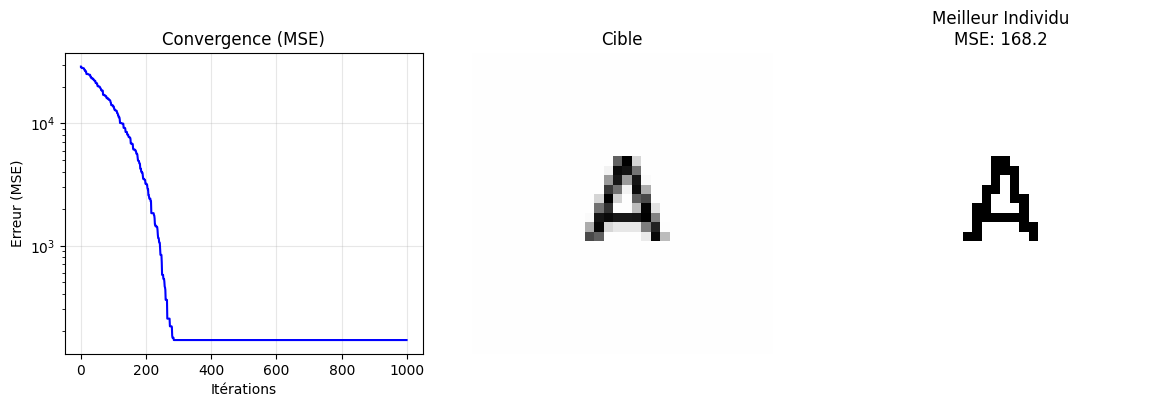

In [17]:
# =============================================================================
# PARAMÈTRES AG
# =============================================================================
POPULATION_SIZE = 100
MAX_GENERATIONS = 1000
ALPHA = 0.1

def eval_img(individual):
    # L'individu est binaire (0 ou 1). On convertit en niveaux de gris (0 ou 255)
    real_pixels = individual * 255
    mse = np.mean((real_pixels.astype(float) - target_flat.astype(float)) ** 2)
    return (mse,)


toolbox.register("evaluate", eval_img)

# =============================================================================
# MOTEUR PBIL
# =============================================================================

def run_pbil_binary(pop_size=100, max_generations=1000, alpha=0.1):
    # Sélection Elite : 10% des meilleurs
    nb_sel = int(pop_size * 0.1)
    if nb_sel < 1: nb_sel = 1

    # Vecteur de probabilités (Init à 0.5 = Incertitude totale)
    probs = np.ones(NB_PIXELS) * 0.5

    logbook = tools.Logbook()
    logbook.header = ['gen', 'best_fit']

    # Stockage du meilleur absolu
    best_ind_ever = None
    best_fit_ever = float('inf')

    print(f"Démarrage PBIL (Pop={pop_size}, Gen={max_generations})...")

    for gen in range(max_generations):

        # SAMPLING (Génération Vectorisée)
        rand_matrix = np.random.random((pop_size, NB_PIXELS))
        # Si rand < proba, alors 1 (Blanc), sinon 0 (Noir)
        pop_matrix = (rand_matrix < probs).astype(np.uint8)
        population = [creator.Individual(row) for row in pop_matrix]

        # EVALUATION
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        # SAUVEGARDE DU MEILLEUR (HALL OF FAME)
        current_best = tools.selBest(population, 1)[0]
        current_fit = current_best.fitness.values[0]

        if current_fit < best_fit_ever:
            best_fit_ever = current_fit
            # On stocke l'individu converti en 0-255 pour l'affichage direct
            best_ind_ever = current_best.copy() * 255

            # MISE A JOUR DU MODELE (PBIL Update Rule)
        best_inds = tools.selBest(population, nb_sel)
        best_matrix = np.array(best_inds)

        # Fréquence des '1' dans l'élite
        freq_best = np.mean(best_matrix, axis=0)

        # Lissage : Le vecteur apprend doucement de l'élite
        probs = (1.0 - alpha) * probs + alpha * freq_best

        logbook.record(gen=gen, best_fit=best_fit_ever)
        if gen % 100 == 0:
            print(f"Gen {gen} - Best MSE: {best_fit_ever:.2f}", end='\r')

    return logbook, best_ind_ever


# =============================================================================
# LANCEMENT ET AFFICHAGE
# =============================================================================
logbook, best_ind = run_pbil_binary(pop_size=POPULATION_SIZE, max_generations=MAX_GENERATIONS, alpha=ALPHA)
best_img = best_ind.reshape(IMG_SHAPE).astype(np.uint8)
final_mse = logbook[-1]['best_fit']
print(f"\nTerminé. Meilleure MSE finale : {final_mse:.2f}")
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
gen = logbook.select("gen")
fit = logbook.select("best_fit")
plt.plot(gen, fit, color='blue')
plt.title("Convergence (MSE)")
plt.xlabel("Itérations")
plt.ylabel("Erreur (MSE)")
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
plt.imshow(target_img, cmap='gray', vmin=0, vmax=255)
plt.title("Cible")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(best_img, cmap='gray', vmin=0, vmax=255)
plt.title(f"Meilleur Individu\nMSE: {final_mse:.1f}") # On utilise final_mse ici aussi
plt.axis('off')
plt.tight_layout()
plt.show()

### 5.3. Adaptation du Compact GA (cGA) au problème boîte noire

Le Compact GA, conçu pour simuler une population à l'aide d'un unique vecteur de probabilités, a été adapté pour la reconstruction d'image en modifiant sa règle de compétition et sa représentation.

#### 5.3.1. Dualité et Minimisation
Le mécanisme central du cGA est le duel entre deux candidats générés aléatoirement.
* **Adaptation :** La règle du "Winner takes all" a été ajustée pour un problème de **minimisation**. Le candidat "Gagnant" est désormais celui qui possède la MSE la plus faible (l'image la plus proche de la cible).
* **Impact :** Le vecteur de probabilités est orienté (shifté) de $1/n$ vers la structure binaire du candidat ayant la plus faible erreur.

#### 5.3.2. Paramétrage de la Population Virtuelle ($n$)
Pour la reconstruction d'image, le paramètre de taille de population virtuelle ($n$) joue un rôle de filtre passe-bas.
* **Choix :** Nous avons utilisé une population virtuelle élevée ($n=1000$).
* **Justification :** Contrairement à OneMax où chaque bit est indépendant, les pixels d'une image forment des formes cohérentes. Une grande inertie ($1/1000$) permet d'éviter que le cGA ne converge prématurément vers du bruit (pixels noirs ou blancs isolés) sur la base d'un duel chanceux. Cela force l'algorithme à accumuler beaucoup de "preuves" avant de figer un pixel.

#### 5.3.3. Coût Computationnel
Bien que très économe en mémoire (stockage de seulement 2 vecteurs de taille $N$), le cGA nécessite ici un nombre d'itérations plus élevé (~40 000 duels) pour atteindre une qualité visuelle comparable à celle du PBIL. Cela illustre le compromis classique : le cGA apprend "lentement mais sûrement" avec un minimum de ressources mémoire.

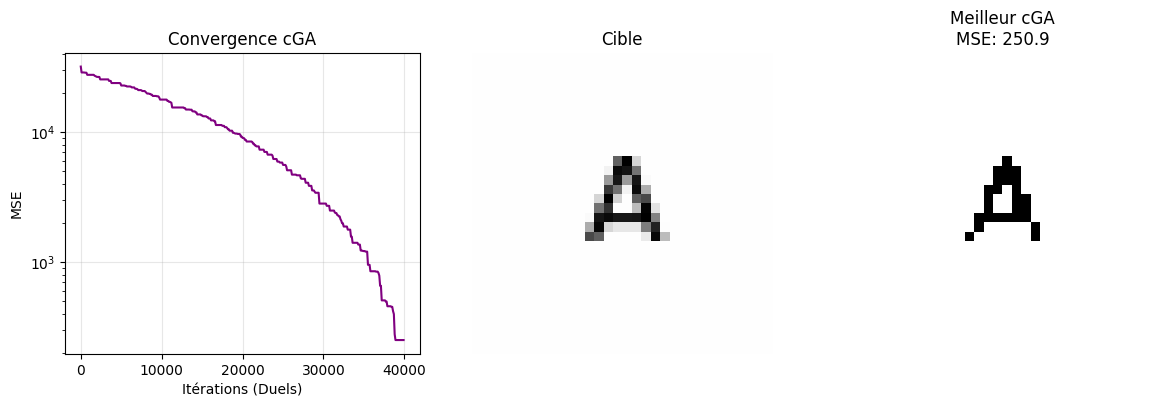

In [18]:
# =============================================================================
# FONCTION D'EVALUATION
# =============================================================================
def evaluate_binary_mse(candidate_binary):
    """
    candidate_binary : vecteur de 0 et 1
    Retourne la MSE par rapport à la cible (0 et 255)
    """
    real_pixels = candidate_binary * 255
    return np.mean((real_pixels.astype(float) - target_flat.astype(float)) ** 2)


# =============================================================================
# MOTEUR CGA (Compact Genetic Algorithm)
# =============================================================================

def run_cga_image(virtual_pop_size=500, max_iterations=30000):
    """
    cGA pour reconstruction d'image.
    step = 1 / virtual_pop_size
    """
    # Pas de mise à jour (Update Step)
    step = 1.0 / virtual_pop_size

    # Vecteur de probabilités (Init à 0.5)
    probs = np.ones(NB_PIXELS) * 0.5

    # Historique pour le graphe
    history_best_fit = []
    iterations_axis = []

    best_ind_ever = None
    best_fit_ever = float('inf')

    print(f"Démarrage cGA (Virtual Pop={virtual_pop_size}, Iter={max_iterations})...")

    # Boucle principale (Duel par Duel)
    for it in range(max_iterations):

        # Génération de 2 Candidats (Vectorisé)
        # On tire 2 masques aléatoires pour comparer aux probas
        rand_a = np.random.random(NB_PIXELS)
        rand_b = np.random.random(NB_PIXELS)

        cand_a = (rand_a < probs).astype(np.uint8)
        cand_b = (rand_b < probs).astype(np.uint8)

        # Evaluation
        fit_a = evaluate_binary_mse(cand_a)
        fit_b = evaluate_binary_mse(cand_b)

        # Tournoi (Minimisation MSE)
        if fit_a <= fit_b:
            winner, loser = cand_a, cand_b
            current_best_mse = fit_a
        else:
            winner, loser = cand_b, cand_a
            current_best_mse = fit_b

        # Mise à jour du "Hall of Fame"
        if current_best_mse < best_fit_ever:
            best_fit_ever = current_best_mse
            best_ind_ever = winner.copy() * 255  # Sauvegarde en 0-255

        # Mise à jour du vecteur de probabilité
        if fit_a != fit_b:
            # On ne met à jour que là où les gènes sont différents
            diff_mask = (winner != loser)

            # Formule cGA : Probs += 1/n vers le gagnant
            # Si winner[i]=1, on ajoute step. Si winner[i]=0, on enlève step.
            # Astuce math : (2*winner - 1) donne +1 ou -1
            update_direction = (2.0 * winner[diff_mask] - 1.0) * step

            probs[diff_mask] += update_direction

            # Clamping pour ne pas dépasser [0, 1] - Important sinon bug
            probs = np.clip(probs, 0.0, 1.0)

        # Log (On n'enregistre pas tout le temps pour ne pas alourdir la mémoire)
        if it % 100 == 0:
            history_best_fit.append(best_fit_ever)
            iterations_axis.append(it)
            print(f"Iter {it} - Best MSE: {best_fit_ever:.2f}", end='\r')

    return iterations_axis, history_best_fit, best_ind_ever


# =============================================================================
# LANCEMENT ET AFFICHAGE
# =============================================================================
iters, fits, best_ind = run_cga_image(virtual_pop_size=1000, max_iterations=40000)
best_img = best_ind.reshape(IMG_SHAPE).astype(np.uint8)
final_mse = fits[-1]
print(f"\nTerminé. Meilleure MSE finale : {final_mse:.2f}")
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(iters, fits, color='purple')
plt.title("Convergence cGA")
plt.xlabel("Itérations (Duels)")
plt.ylabel("MSE")
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
plt.imshow(target_img, cmap='gray', vmin=0, vmax=255)
plt.title("Cible")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(best_img, cmap='gray', vmin=0, vmax=255)
plt.title(f"Meilleur cGA\nMSE: {final_mse:.1f}")
plt.axis('off')
plt.tight_layout()
plt.show()

### 5.4 Conclusion Générale et Perspectives

Cette section compare l'efficacité du **SSGA**, de l'**EDA (PBIL)** et du **cGA** sur la tâche de minimisation de l'erreur quadratique (MSE) pour reconstruire une image cible de $32 \times 32$ pixels.

#### 5.4.1. Steady-State GA (SSGA) : La Force Brute
* **Comportement :** Le SSGA, avec sa stratégie de remplacement immédiat (*Inverse-Worst*), montre une descente très rapide de l'erreur au début.
* **Résultat Visuel :** Il converge vite vers la forme globale de la lettre 'A', mais l'image finale souffre souvent d'un **bruit résiduel** (aspect "sel et poivre").
* **Explication :** L'algorithme travaille au niveau de l'individu complet. Un individu possédant 99% de bons pixels mais 1% de pixels parasites peut dominer la population et survivre très longtemps. L'algorithme peine à "nettoyer" ces derniers détails uniquement par mutation aléatoire, car il manque une vision statistique globale.

#### 5.4.2. EDA (PBIL Binaire) : L'Apprentissage Structurel (Le Meilleur)
* **Comportement :** Le PBIL (*Population-Based Incremental Learning*) s'est révélé être **l'approche la plus performante** pour ce problème. Grâce à son vecteur de probabilités et son taux d'apprentissage ($\alpha=0.1$), il agit comme un filtre statistique.
* **Résultat Visuel :** L'image finale est extrêmement propre et contrastée (Noir/Blanc net), sans bruit parasite.
* **Explication :** Contrairement au SSGA, le PBIL ne retient pas des individus, mais des **probabilités**. Le bruit aléatoire est statistiquement éliminé car il n'apparaît pas fréquemment chez *tous* les meilleurs individus simultanément. Seule la structure commune et répétée (la forme de la lettre) s'imprime durablement dans le modèle.

#### 5.4.3. Compact GA (cGA) : L'Inertie Économe
* **Comportement :** Le cGA progresse lentement mais sûrement. Sa courbe de convergence est linéaire ou sigmoïde, sans les à-coups du SSGA.
* **Résultat Visuel :** Similaire au PBIL (image propre), mais nécessite un nombre d'itérations beaucoup plus élevé (x2 à x3 le budget du PBIL) pour atteindre la même netteté.
* **Explication :** Pour éviter de converger prématurément sur une mauvaise image, le cGA nécessite une "population virtuelle" élevée ($N=1000$). Cela crée une forte inertie : il faut des milliers de duels confirmant qu'un pixel doit être noir pour que le vecteur de probabilité bascule définitivement.


**Conclusion :** Pour la reconstruction d'image, l'approche probabiliste avec mémoire (**PBIL**) est supérieure. Elle capture la "conviction" que certains pixels font partie de la forme, permettant un nettoyage automatique du bruit que le SSGA peine à effectuer localement.


## 6. Mécanismes de Sélection Adaptative d'Opérateurs (AOS)

Dans cette section, nous étudions l'impact des stratégies de contrôle de paramètres sur la résolution du problème OneMax ($N=1000$). L'objectif est de comparer des approches statiques et dynamiques pour sélectionner l'opérateur de mutation optimal parmi un ensemble de 5 opérateurs : `bit-flip`, `1-flip`, `3-flips`, `5-flips` et `Identity` (opérateur neutre).

### 6.1. Présentation des Méthodes de Sélection

Nous avons implémenté et comparé trois stratégies de type "Bandit Manchot" (Multi-Armed Bandit) face à deux méthodes témoins.

#### 6.1.1. Roulette Adaptative (Adaptive Roulette Wheel)
Cette méthode, basée sur le principe de *Probability Matching*, adapte les probabilités de sélection des opérateurs proportionnellement à leurs performances passées.
* **Principe :** Chaque opérateur $i$ possède une utilité $u_i$ mise à jour par une moyenne mobile exponentielle (paramètre $\alpha$) pour favoriser les récompenses récentes.
* **Formule :** La probabilité de sélection à l'itération $t+1$ est donnée par :
    $$\pi_i(t+1) = p_{min} + (1 - N \cdot p_{min}) \frac{u_i(t+1)}{\sum u_k}$$
    où $p_{min}$ assure une exploration minimale pour éviter l'extinction d'un opérateur.
* **Intérêt :** Cette méthode est conçue pour des environnements à dynamique "douce" (*Soft Dynamic*), où les changements sont progressifs.

#### 6.1.2. UCB (Upper Confidence Bound)
L'algorithme UCB est une stratégie déterministe optimiste issue de la théorie des bandits stationnaires.
* **Principe :** Il sélectionne l'opérateur maximisant la somme de l'exploitation (moyenne des gains $q_i$) et de l'exploration (liée à l'incertitude).
* **Formule :**
    $$A_t = \text{argmax}_i \left[ q_i(t) + C \sqrt{\frac{2 \ln t}{n_i(t)}} \right]$$
* **Limite :** Sans mécanisme d'oubli, l'UCB considère l'historique complet, ce qui peut le rendre inerte face aux changements de régime (problème de non-stationnarité).

#### 6.1.3. DMAB (Dynamic Multi-Armed Bandit)
Le DMAB est une extension de l'UCB spécifiquement conçue pour les environnements dynamiques (Non-Stationnaires).
* **Principe :** Il couple la stratégie de sélection UCB avec un test statistique de détection de changement : le **Test de Page-Hinkley**.
* **Mécanisme :** Le test surveille la dérive des récompenses. Si une chute brutale de performance est détectée (dépassement d'un seuil $\gamma$), le système déclenche un **Restart**.
* **Restart :** Cette procédure réinitialise la mémoire du bandit (compteurs à 0), forçant une nouvelle phase d'exploration pour s'adapter au nouvel environnement.




In [20]:
# ==============================================================================
# CONFIGURATION
# ==============================================================================
ONE_MAX_LENGTH = 1000
POPULATION_SIZE = 20
MAX_GENERATIONS = 10000

# Hyper-paramètres des stratégies
ALPHA = 0.2  # Roulette : Vitesse d'oubli
P_MIN = 0.05  # Roulette : Exploration mini
UCB_C = 0.5  # UCB/DMAB : Facteur d'exploration
PH_DELTA = 0.1  # DMAB : Marge de tolérance (Page-Hinkley)
PH_GAMMA = 5.0  # DMAB : Seuil de déclenchement du Restart

In [21]:
# ==============================================================================
# CLASSES DE STRATÉGIES (BANDITS)
# ==============================================================================
class BanditStrategy:
    def __init__(self, n_arms, names):
        self.n_arms = n_arms
        self.names = names
        self.history_probs = {name: [] for name in names}

    def select(self): raise NotImplementedError

    def update(self, arm_idx, reward): pass

    def get_name(self): return self.__class__.__name__



class UniformStrategy(BanditStrategy):
    def select(self):
        self._log_history(1.0 / self.n_arms)  # Log théorique
        return np.random.randint(self.n_arms)

    def _log_history(self, prob):
        for name in self.names: self.history_probs[name].append(prob)



# --- Baseline : Opérateur Unique ---
class SingleOpStrategy(BanditStrategy):
    def __init__(self, n_arms, names, fixed_op_name="1-flip"):
        super().__init__(n_arms, names)
        self.fixed_idx = names.index(fixed_op_name)

    def select(self):
        for i, name in enumerate(self.names):
            self.history_probs[name].append(1.0 if i == self.fixed_idx else 0.0)
        return self.fixed_idx


# --- Stratégie 3 : Roulette Adaptative ---
class AdaptiveRoulette(BanditStrategy):
    def __init__(self, n_arms, names, alpha=0.1, p_min=0.05):
        super().__init__(n_arms, names)
        self.alpha = alpha
        self.p_min = p_min
        self.utilities = np.ones(n_arms)
        self.probs = np.ones(n_arms) / n_arms

    def select(self):
        for i, name in enumerate(self.names):
            self.history_probs[name].append(self.probs[i])
        return np.random.choice(self.n_arms, p=self.probs)

    def update(self, arm_idx, reward):
        self.utilities[arm_idx] = (1 - self.alpha) * self.utilities[arm_idx] + self.alpha * reward
        sum_u = np.sum(self.utilities)
        if sum_u == 0: sum_u = 1.0
        self.probs = self.p_min + (1 - self.n_arms * self.p_min) * (self.utilities / sum_u)


# --- Stratégie 4 : UCB Standard ---
class UCB(BanditStrategy):
    def __init__(self, n_arms, names, c=0.5):
        super().__init__(n_arms, names)
        self.c = c
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_counts = 0

    def select(self):
        self.total_counts += 1
        # Exploration forcée au début
        for i in range(self.n_arms):
            if self.counts[i] == 0:
                self._log_choice(i)
                return i

        # Calcul scores UCB
        ucb = self.values + self.c * np.sqrt(2 * np.log(self.total_counts) / self.counts)
        choice = np.argmax(ucb)
        self._log_choice(choice)
        return choice

    def _log_choice(self, choice):
        for i, name in enumerate(self.names):
            self.history_probs[name].append(1.0 if i == choice else 0.0)

    def update(self, arm_idx, reward):
        self.counts[arm_idx] += 1
        n = self.counts[arm_idx]
        self.values[arm_idx] = ((n - 1) / n) * self.values[arm_idx] + (1 / n) * reward

    def reset(self):
        """Remise à zéro pour le DMAB"""
        self.counts.fill(0)
        self.values.fill(0)
        self.total_counts = 0


# --- Stratégie 5 : DMAB (UCB + Page-Hinkley) ---
class DMAB(UCB):
    def __init__(self, n_arms, names, c=0.5, delta=0.1, gamma=5.0):
        super().__init__(n_arms, names, c)
        self.delta = delta
        self.gamma = gamma
        # Mémoire Page-Hinkley
        self.ph_mean = np.zeros(n_arms)
        self.ph_sum = np.zeros(n_arms)
        self.ph_min = np.zeros(n_arms)
        self.restarts = 0

    def update(self, arm_idx, reward):
        super().update(arm_idx, reward)  # Mise à jour UCB classique

        # Test de Page-Hinkley (Détection de dégradation)
        # On update la moyenne observée
        n = self.counts[arm_idx]
        self.ph_mean[arm_idx] += (reward - self.ph_mean[arm_idx]) / n

        # On accumule la dérive négative (quand reward < moyenne)
        self.ph_sum[arm_idx] += (reward - self.ph_mean[arm_idx]) + self.delta

        if self.ph_sum[arm_idx] < self.ph_min[arm_idx]:
            self.ph_min[arm_idx] = self.ph_sum[arm_idx]

        # Si la différence dépasse le seuil Gamma -> RESTART
        if self.ph_sum[arm_idx] - self.ph_min[arm_idx] > self.gamma:
            # print(f"DMAB Restart déclenché à cause de {self.names[arm_idx]}!")
            self.restarts += 1
            self.reset()
            # Reset spécifique PH
            self.ph_sum.fill(0)
            self.ph_min.fill(0)
            self.ph_mean.fill(0)

In [22]:
# ==============================================================================
# MOTEUR ÉVOLUTIONNAIRE
# ==============================================================================
if "FitnessMax" in dir(creator): del creator.FitnessMax
if "Individual" in dir(creator): del creator.Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()


# Opérateurs demandés
def mutKFlip(ind, k):
    idx = np.random.choice(len(ind), k, replace=False)
    ind[idx] = 1 - ind[idx]
    return ind,


def mutFlipBit(ind, p):
    mask = np.random.random(len(ind)) < p
    ind[mask] = 1 - ind[mask]
    return ind,


def mutIdentity(ind): return ind,  # Opérateur inutile


operators_pool = {
    "bit-flip": lambda ind: mutFlipBit(ind, 1.0 / ONE_MAX_LENGTH),
    "1-flip": lambda ind: mutKFlip(ind, k=1),
    "3-flips": lambda ind: mutKFlip(ind, k=3),
    "5-flips": lambda ind: mutKFlip(ind, k=5),
    "Identity": lambda ind: mutIdentity(ind)  # Test
}
op_names = list(operators_pool.keys())
N_OPS = len(op_names)

toolbox.register("individual", lambda icls, size: icls(np.random.randint(0, 2, size)), creator.Individual,
                 ONE_MAX_LENGTH)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", lambda ind: (float(np.sum(ind)),))


def run_experiment(strategy, label):
    print(f"Exécution : {label}...")
    pop = toolbox.population(n=POPULATION_SIZE)
    for ind in pop: ind.fitness.values = toolbox.evaluate(ind)

    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("max", np.max)
    logbook = tools.Logbook()

    for gen in range(MAX_GENERATIONS):
        # Sélection & Clonage
        parents = tools.selTournament(pop, 2, tournsize=3)
        offspring = [toolbox.clone(p) for p in parents]
        f_parents_max = max(p.fitness.values[0] for p in parents)

        # Le Bandit choisit
        op_idx = strategy.select()
        op_func = operators_pool[op_names[op_idx]]

        # Application
        reward = 0
        for child in offspring:
            op_func(child)
            child.fitness.values = toolbox.evaluate(child)
            gain = child.fitness.values[0] - f_parents_max
            if gain > 0: reward += gain

        # Le Bandit apprend
        strategy.update(op_idx, reward)

        # Remplacement Steady State
        pop[:] = pop + offspring
        pop.sort(key=lambda x: x.fitness.values[0], reverse=True)
        pop[:] = pop[:POPULATION_SIZE]

        record = stats.compile(pop)
        logbook.record(gen=gen, **record)
        if record["max"] >= ONE_MAX_LENGTH: break

    return logbook, strategy.history_probs

In [26]:
# ==============================================================================
# LANCEMENT ET VISUALISATION
# ==============================================================================

# Instanciation des 5 stratégies
strats = [
    (UniformStrategy(N_OPS, op_names), "Uniforme", 'orange'),
    (SingleOpStrategy(N_OPS, op_names), "Single (1-flip)", 'gray'),
    (AdaptiveRoulette(N_OPS, op_names, alpha=ALPHA, p_min=P_MIN), "Roulette", 'blue'),
    (UCB(N_OPS, op_names, c=UCB_C), "UCB (Statique)", 'green'),
    (DMAB(N_OPS, op_names, c=UCB_C, delta=PH_DELTA, gamma=PH_GAMMA), "DMAB (Dynamique)", 'red')
]

results = {}
for strat_obj, name, color in strats:
    log, probs = run_experiment(strat_obj, name)
    results[name] = {"log": log, "probs": probs, "color": color}

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
for name, res in results.items():
    log = res["log"]
    ax1.plot(log.select("gen"), log.select("max"), label=name, color=res["color"], linewidth=2)
ax1.set_title("Comparaison des Performances (Fitness)")
ax1.set_xlabel("Itérations")
ax1.set_ylabel("Fitness Max")
ax1.legend()
ax1.grid(True, alpha=0.3)


def plot_probs(ax, probs, title):
    for op in op_names:
        data = probs[op]
        window = 50 if len(data) > 100 else 1
        y_smooth = np.convolve(data, np.ones(window) / window, mode='same')
        ax.plot(y_smooth, label=op)
    ax.set_title(title)
    ax.legend(fontsize='small')
    ax.set_ylim(-0.05, 1.05)
    ax.grid(True, alpha=0.3)

ax2 = fig.add_subplot(gs[1, 0])
plot_probs(ax2, results["Roulette"]["probs"], "Détail : Roulette Adaptative")
ax3 = fig.add_subplot(gs[1, 1])
plot_probs(ax3, results["UCB (Statique)"]["probs"], "Détail : UCB (Standard)")
ax4 = fig.add_subplot(gs[1, 2])
plot_probs(ax4, results["DMAB (Dynamique)"]["probs"], "Détail : DMAB (Avec Restarts)")
plt.tight_layout()
plt.show()

dmab_restarts = strats[4][0].restarts
print(f"\n[INFO] Le DMAB a effectué {dmab_restarts} redémarrages (Restarts) au cours de la recherche.")


[INFO] Le DMAB a effectué 70 redémarrages (Restarts) au cours de la recherche.


### 6.2. Analyse Expérimentale

Les expériences ont été menées sur 6000 générations. Les stratégies adaptatives sont comparées à une sélection **Uniforme** (Aléatoire) et une stratégie **Single Operator** (uniquement `1-flip`).

#### 6.2.1. Classement des Performances
L'analyse de la fitness maximale permet d'établir le classement suivant (du meilleur au pire) :
1.  **Roulette Adaptative** (Convergence la plus rapide et stable)
2.  **Single Operator (1-flip)** (Baseline très performante sur la fin)
3.  **DMAB** (Pénalisé par les redémarrages)
4.  **Uniforme** (Pénalisé par l'opérateur `Identity`)
5.  **UCB Statique** (Incapable de s'adapter)

#### 6.2.2. Discussion des Résultats

**Supériorité de la Roulette Adaptative (Adaptation Douce) :**
La Roulette obtient les meilleurs résultats car le problème OneMax présente une dynamique progressive. L'opérateur optimal glisse doucement de `5-flips` (début) vers `1-flip` (fin). L'inertie de la Roulette ($\alpha=0.2$) permet de suivre ce changement sans à-coups, tout en conservant une diversité suffisante ($p_{min}$) pour réactiver le `1-flip` au bon moment.

**Le Coût de l'Apprentissage du DMAB :**
Le DMAB termine derrière l'opérateur unique. L'analyse des logs révèle que l'algorithme a effectué **67 Redémarrages (Restarts)** durant la recherche.
* **Interprétation :** Le test de Page-Hinkley s'est révélé trop sensible au bruit stochastique des mutations, déclenchant des resets intempestifs.
* **Conséquence :** À chaque *Restart*, le DMAB subit une "amnésie" totale et doit ré-explorer tous les opérateurs (y compris les moins bons), ce qui ralentit la convergence finale par rapport à un opérateur unique stable.

**Échec de l'UCB et Validation de l'Identité :**
* **UCB :** L'algorithme reste "verrouillé" sur l'opérateur `5-flips` qui a rapporté beaucoup de points au début, illustrant le défaut des méthodes stationnaires.
* **Opérateur Identité :** Toutes les méthodes adaptatives (Roulette, UCB, DMAB) ont réussi à identifier l'opérateur `Identity` comme inutile (probabilité de sélection proche de 0), contrairement à la méthode Uniforme qui continue de l'utiliser, gaspillant 20% des ressources de calcul.